In [4]:
# Setup Pakages
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as matplot
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import requests
import json
from pandas.plotting import register_matplotlib_converters
import hvplot.pandas

# Load second Dataset with Corona Cases
payload = {"code": "ALL"}
URL = "https://api.statworx.com/covid"
response = requests.post(url=URL, data=json.dumps(payload))
df_covid = pd.DataFrame.from_dict(json.loads(response.text))
df_covid = df_covid[df_covid['code'] == 'US']

# add the date column as variable
df_covid["Date"] = pd.to_datetime(df_covid["date"])

# delete some columns that we won't use
df_covid.drop(
    ["day", "month", "year", "country", "code", "population", "date"],
    axis=1,
    inplace=True,
)

# Summarize cases over all countries
df_covid = df_covid.groupby(["Date"]).sum()
df_covid = df_covid.rename(columns = { "cases": "Cases Reported", "deaths": "Deaths Reported", "cases_cum": "Cases Total", "deaths_cum": "Deaths Total"})
df_covid

,Cases Reported,Deaths Reported,Cases Total,Deaths Total
Date,,,,
2019-12-31,0,0,0,0
2020-01-01,0,0,0,0
2020-01-02,0,0,0,0
2020-01-03,0,0,0,0
2020-01-04,0,0,0,0
...,...,...,...,...
2020-12-10,220025,3124,15391701,289431
2020-12-11,224680,2748,15616381,292179
2020-12-12,234633,3343,15851014,295522


In [5]:
df_covid_new = df_covid.copy()

# Read the data for different assets
today_date = datetime.today().strftime("%Y-%m-%d")
start_date = "2020-03-01"
asset_dict = {
    "^GSPC": "SP500",
    "DAX": "DAX",
    "^N225": "N225",
    "^VIX": "VolatilityIndex",
    "TSM": "TaiwanSemiconductor",
    "INTC": "Intel",
    "NVDA": "Nvidia",
    "AMD": "AMD",
    "AAL": "AmericanAirlines",
    "UAL": "UnitedAirlines",
    "AMZN": "Amazon",
    "GOOG": "Google",
    "TSLA": "Tesla",
    "GME": "GameStop",
    "BTC-USD": "BTCUSD",
    "ETH-USD": "ETHUSD",
    "XRP-USD": "XRPUSD",
    "CL=F": "Oil",
    "GC=F": "Gold",
    "ZB=F": "UsTreasuryBond",
    "USDCAD=X": "USDCAD",
    "USDEUR=X": "USDEUR",
    }

col_list = []
# Join the dataframes
for key, value in asset_dict.items():
    print(key, value)    
    try:
        df_temp = web.DataReader(
            key, start=start_date, end=today_date, data_source="yahoo")
    except ValueError: 
        print(f' {key} symbol not found')
    # convert index to Date Format
    df_temp.index = pd.to_datetime(df_temp.index) 
    df_temp.rename(columns={"Close": value}, inplace=True) # Rename Close Column       
    df_covid_new = pd.merge(
        left=df_covid_new,
        right=df_temp[value],
        how="inner",
        left_index=True, right_index=True)     

df_covid_new.tail()

^GSPC SP500
DAX DAX
^N225 N225
^VIX VolatilityIndex
TSM TaiwanSemiconductor
INTC Intel
NVDA Nvidia
AMD AMD
AAL AmericanAirlines
UAL UnitedAirlines
AMZN Amazon
GOOG Google
TSLA Tesla
GME GameStop
BTC-USD BTCUSD
ETH-USD ETHUSD
XRP-USD XRPUSD
CL=F Oil
GC=F Gold
ZB=F UsTreasuryBond
USDCAD=X USDCAD
USDEUR=X USDEUR


,Cases Reported,Deaths Reported,Cases Total,Deaths Total,SP500,DAX,N225,VolatilityIndex,TaiwanSemiconductor,Intel,...,Tesla,GameStop,BTCUSD,ETHUSD,XRPUSD,Oil,Gold,UsTreasuryBond,USDCAD,USDEUR
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-08,197334,1433,14954332,283743,3702.250000,30.150000,26467.080078,20.680000,105.639999,50.689999,...,649.880005,16.940001,18321.144531,554.827759,0.558836,45.599998,1870.800049,172.09375,1.28020,0.825550
2020-12-09,217344,2564,15171676,286307,3672.820068,30.125000,26817.939453,22.270000,104.419998,50.070000,...,604.479980,13.660000,18553.916016,573.479126,0.583590,45.520000,1834.599976,171.50000,1.28162,0.825700
2020-12-10,220025,3124,15391701,289431,3668.100098,30.350000,26756.240234,22.520000,104.230003,50.259998,...,627.070007,14.120000,18264.992188,559.678528,0.572954,46.779999,1833.599976,172.46875,1.28244,0.827900
2020-12-11,224680,2748,15616381,292179,3663.459961,29.840000,26652.519531,23.309999,104.029999,49.730000,...,609.989990,13.310000,18058.904297,545.797363,0.546483,46.570000,1839.800049,172.62500,1.27392,0.823432
2020-12-14,189723,1340,16256754,299177,3647.489990,30.139999,26732.439453,24.719999,103.559998,50.470001,...,639.830017,12.720000,19246.644531,586.011169,0.497712,46.990002,1828.699951,172.65625,1.27506,0.824171


ValueError: num must be 1 <= num <= 24, not 25

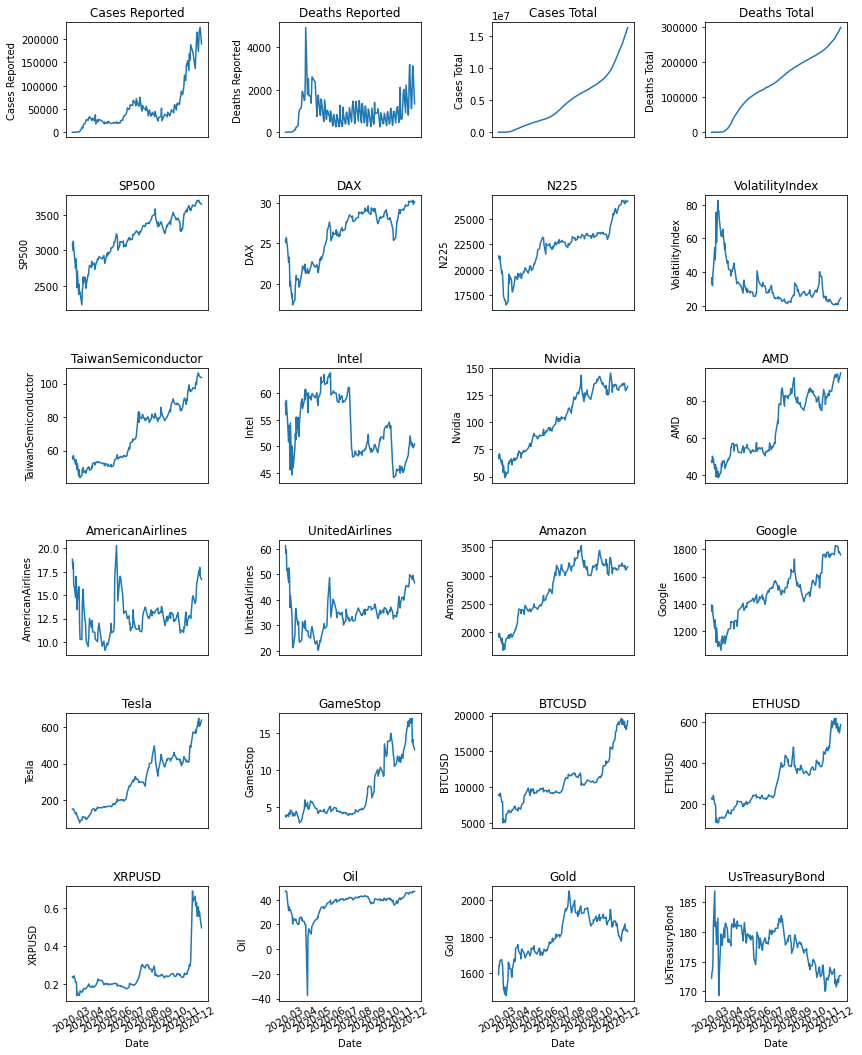

In [6]:
# Plot line charts
df_plot = df_covid_new.copy()

list_length = df_plot.shape[1]
ncols = 4
nrows = int(round(list_length / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0, list_length):
        ax = plt.subplot(nrows,ncols,i+1)
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.set_title(df_plot.columns[i])
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

In [7]:
# Plotting a diagonal correlation matrix
sns.set(style="white")

# Compute the correlation matrix
df = pd.DataFrame(df_covid_new, columns=col_list)
corr = df_covid_new.corr()
corr

,Cases Reported,Deaths Reported,Cases Total,Deaths Total,SP500,DAX,N225,VolatilityIndex,TaiwanSemiconductor,Intel,...,Tesla,GameStop,BTCUSD,ETHUSD,XRPUSD,Oil,Gold,UsTreasuryBond,USDCAD,USDEUR
Cases Reported,1.000000,0.473407,0.890003,0.767663,0.699733,0.596691,0.790369,-0.490306,0.795182,-0.466221,...,0.789788,0.771360,0.912422,0.820922,0.806759,0.415704,0.401208,-0.619648,-0.658570,-0.646291
Deaths Reported,0.473407,1.000000,0.295747,0.224508,0.189969,0.092790,0.220091,-0.284178,0.213223,0.049314,...,0.235057,0.272967,0.334988,0.271900,0.393726,-0.157777,0.131155,-0.049381,-0.079186,-0.044404
Cases Total,0.890003,0.295747,1.000000,0.943348,0.869154,0.772446,0.897626,-0.592974,0.959673,-0.608641,...,0.959934,0.903357,0.948100,0.951876,0.794369,0.553491,0.636387,-0.696915,-0.843983,-0.855723
Deaths Total,0.767663,0.224508,0.943348,1.000000,0.936557,0.875895,0.935372,-0.741137,0.939427,-0.511151,...,0.950756,0.812349,0.887112,0.921552,0.653548,0.621464,0.786036,-0.597874,-0.875324,-0.881938
SP500,0.699733,0.189969,0.869154,0.936557,1.000000,0.964576,0.959471,-0.851711,0.914890,-0.402161,...,0.920215,0.716951,0.858432,0.917666,0.650952,0.704626,0.816804,-0.550046,-0.948254,-0.896412
DAX,0.596691,0.092790,0.772446,0.875895,0.964576,1.000000,0.933702,-0.861136,0.845719,-0.331982,...,0.857311,0.574971,0.759704,0.848291,0.576777,0.757546,0.831994,-0.427294,-0.932595,-0.889202
N225,0.790369,0.220091,0.897626,0.935372,0.959471,0.933702,1.000000,-0.806676,0.889183,-0.371940,...,0.906074,0.748270,0.908306,0.912215,0.711851,0.699071,0.709622,-0.596473,-0.915550,-0.853101
VolatilityIndex,-0.490306,-0.284178,-0.592974,-0.741137,-0.851711,-0.861136,-0.806676,1.000000,-0.645103,0.019861,...,-0.666816,-0.408657,-0.659682,-0.690273,-0.475848,-0.579411,-0.765146,0.246660,0.720246,0.612627
TaiwanSemiconductor,0.795182,0.213223,0.959673,0.939427,0.914890,0.845719,0.889183,-0.645103,1.000000,-0.663966,...,0.967933,0.838912,0.897454,0.958155,0.724789,0.608511,0.774136,-0.611303,-0.896010,-0.930871
Intel,-0.466221,0.049314,-0.608641,-0.511151,-0.402161,-0.331982,-0.371940,0.019861,-0.663966,1.000000,...,-0.565129,-0.511366,-0.529977,-0.609897,-0.389291,-0.296666,-0.447215,0.416097,0.494852,0.658311


<ipython-input-8-3dfc6069e981>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

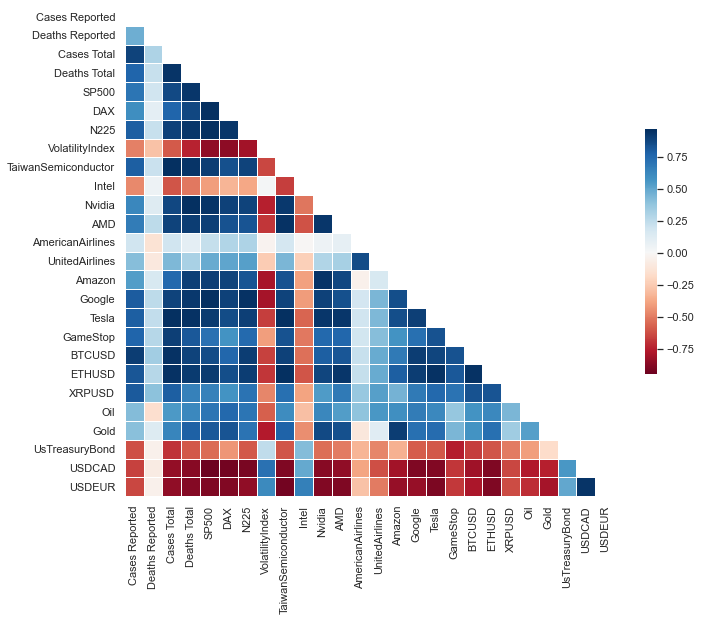

In [8]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = "RdBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

In [13]:
df_plot.head()

,Cases Reported,Deaths Reported,Cases Total,Deaths Total,SP500,DAX,N225,VolatilityIndex,TaiwanSemiconductor,Intel,...,Tesla,GameStop,BTCUSD,ETHUSD,XRPUSD,Oil,Gold,UsTreasuryBond,USDCAD,USDEUR
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,20,1,89,2,3090.229980,25.360001,21344.080078,33.419998,55.980000,58.180000,...,148.723999,3.83,8869.669922,230.569778,0.238747,46.750000,1592.300049,172.21875,1.34071,0.90487
2020-03-03,14,4,103,6,3003.370117,25.091000,21082.730469,36.820000,54.880001,55.970001,...,149.102005,3.63,8787.786133,224.479630,0.234381,47.180000,1642.099976,173.31250,1.33251,0.89734
2020-03-04,22,3,125,9,3130.120117,25.719999,21100.060547,31.990000,57.080002,58.680000,...,149.899994,3.77,8755.246094,224.517975,0.234530,46.779999,1641.099976,173.40625,1.33776,0.89440
2020-03-05,34,2,159,11,3023.939941,25.149000,21329.119141,39.619999,55.730000,56.959999,...,144.908005,3.96,9078.762695,229.268188,0.239582,45.900002,1666.400024,174.93750,1.33846,0.89774
2020-03-06,74,1,233,12,2972.370117,24.815001,20749.750000,41.939999,55.070000,55.770000,...,140.695999,3.92,9122.545898,243.525299,0.244088,41.279999,1670.800049,180.96875,1.33938,0.89096


In [20]:
df_plot.hvplot.line(x='Cases Total', y='VolatilityIndex')

:Curve   [Cases Total]   (VolatilityIndex)

In [21]:
df_plot.hvplot.line(x='Cases Total', y='Intel')

:Curve   [Cases Total]   (Intel)